# Numpy Arrays
Numpy arrays are the Python container specialised for multi-dimensional numerical calculations and data visualization. They are offered within the `numpy` module.

- They form an array of *homogeneous* (typically numerical) data
- A list of numerical types available for numpy-arrays is [here](http://docs.scipy.org/doc/numpy/user/basics.types.html)
- They consist of the data-array and information on the structure of the array (metadata on memory layout)
- Besides the array-type the `numpy`-module contains *vectorized* functions allowing *very fast* manipulation of `numpy`-arrays.

In [1]:
import numpy as np

# numpy-array creation from a list:
a = np.array([1.0, 2.0, 3.0, 4.0])  # np.array is a type-conversion function
print(type(a))     # the type is numpy-array
print(a.dtype)     # the data-type object.
print(a.ndim)      # number of array dimensions
print(a.shape)     # shape of an array (interesting mainly for multi-dimensional arrays)
print(a.strides)   # The number of bytes fron one element to the next

<class 'numpy.ndarray'>
float64
1
(4,)
(8,)


## Basic Array creation

In [2]:
import numpy as np

# many possibilities to create 
a = np.arange(0.0, 1.0, 0.1)  # array between two limits with a given distance
                              # between array elements. The array if a half-open
                              # interval!
print(a)
b = np.linspace(0.0, 1.0, 11) # array between two limits with a given number of
                              # array elements. Both limits are contained in the
                              # array
print(b)
c = np.zeros(10)              # array of 10 elements with 0 
print(c)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


## Slicing operations
Array slicing for (one-dimensional) numpy arrays works exactly as for lists and other Python containers

In [3]:
import numpy as np

a = np.arange(0, 11, 1)
print(a)
print(a[5])    # access 6th element (zero-based arrays!)
print(a[2:6])  # access third up to the sixth element
print(a[1::2]) # access every other element starting from the second
print(a[:-1])  # access all elements except the last

[ 0  1  2  3  4  5  6  7  8  9 10]
5
[2 3 4 5]
[1 3 5 7 9]
[0 1 2 3 4 5 6 7 8 9]


### Exercises
- create a numpy array of 10 zeros of 'int32' data-type.
- create an array with 10 logarithmically spaces elements between 1 and 100.
- Use your knowledge on C or Fortran to explain the result of the following cell

In [10]:
import numpy as np

a = np.zeros(10, dtype='int32')
print(a.dtype)
b = np.logspace(0,2,10)
print(b)

int32
[   1.            1.66810054    2.7825594     4.64158883    7.74263683
   12.91549665   21.5443469    35.93813664   59.94842503  100.        ]


In [11]:
import numpy as np

a = np.arange(0,11, 1)
print("Array a:", a)
b = a[2:5]    # array slicing creates 'views' of an existing array!
print("Array b:", b)
b[0] = 100
print("Array b:", b)
print("Array a:", a)

c = np.arange(0,11, 1)
print("Array c:", c)
d = c[2:5].copy()  # we create an explicit copy here!
print("Array d:", d)
d[0] = 100
print("Array d:", d)
print("Array c:", c)

Array a: [ 0  1  2  3  4  5  6  7  8  9 10]
Array b: [2 3 4]
Array b: [100   3   4]
Array a: [  0   1 100   3   4   5   6   7   8   9  10]
Array c: [ 0  1  2  3  4  5  6  7  8  9 10]
Array d: [2 3 4]
Array d: [100   3   4]
Array c: [ 0  1  2  3  4  5  6  7  8  9 10]


## Array operations
`numpy`-arrays can be connected with mathematical operations and they behave as you would expect them to.

In [13]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
print(x + y)   # element-wise addition
print(x * y)   # element-wise multiplication
print(x + 2 * y)  # more complex manipulation
print(x**y)
a = y > 4
print(a)    # element-wise comparison resulting in
                # a bool-array!
    

[5 7 9]
[ 4 10 18]
[ 9 12 15]
[  1  32 729]
[False  True  True]


application of high-performace, vectorized functions:

In [17]:
x = np.linspace(0.0, 2.0 * np.pi, 50)
y = np.sin(x)

**Manipulate numpy-arrays with vector operations whenever possible!** If somebody tells you that Python is about 10 times slower than C, they talk about element-wise array manipulations with loops!

In [18]:
%%timeit
# fast vector operations
x = np.linspace(0.0, 2.0 * np.pi, 100)
y = np.sin(x)

The slowest run took 11.94 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 7.16 µs per loop


In [19]:
%%timeit
# C-like element-wise array manipulation
x = np.linspace(0.0, 2.0 * np.pi, 100)
y = np.zeros(len(x))

for i in range(len(x)):
    y[i] = np.sin(x[i])

The slowest run took 4.73 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 84.9 µs per loop


### Exercise:
- Calculate the `scalar` product of two one-dimensional numpy arrays: $s=\sum_{i=1}^Na_ib_i$.

  **Hint**: The function `np.sum` calculates the sum of the elements of an array.
- Use the function `random_sample` witin the module `numpy.random` to create a numpy array $x$ of 1000 uniformly distributed random numbers within $[-1;1)$.
- Calculate the mean $\bar{x}=\frac 1N\sum_{i=1}^N x_i$ and the standard deviation
$s_x=\sqrt{\frac 1{N-1}\sum_{i=1}^N(x_i-\bar{x})^2}$ of the elements in $x$. Does the result meet your expectations?

  You can use the function `numpy.sum` **but not** the functions `numpy.mean` and `numpy.std` for this exercise!


In [48]:
# your solutions here
a = np.linspace(2,22,9)
b = np.linspace(1,11,9)

scalar = np.sum(a*b)
#print(scalar)

ran = 2*np.random.random_sample(1000)-1
#print(ran[:30])

N = np.size(ran)
mu = np.sum(ran)/N
print('Mean is ', mu)
std = np.sqrt(1/(N-1)*np.sum((ran-mu)**2))
print('Stdev is ', std, np.std(ran))

Mean is  -0.0233863404662
Stdev is  0.57485388029 0.574566381457


## Basic plotting of numpy-Arrays
We will cover matplotlib in more detail later but we give some basic commands here for simple plots!

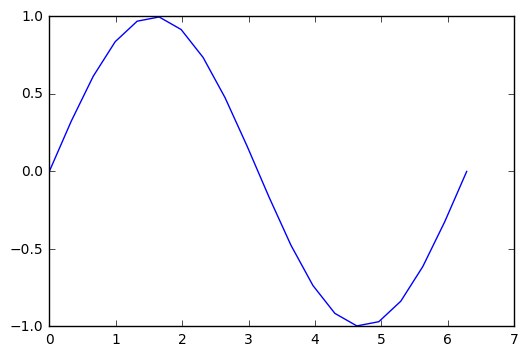

In [44]:
%matplotlib inline
# The previous line is necessary that matplotlib plots
# appear within the Jupyter documents. It is sufficent to
# give it once within a document.
import numpy as np
import matplotlib.pyplot as plt

# matplotlib plots numpy-array values!
x = np.linspace(0.0, 2.0 * np.pi, 20)
y = np.sin(x)

# a simple x-y plot
plt.plot(x, y)


In [49]:
a = np.array([1, 2, 3])
b = a
print(a)
b[1] = 4
print(b)
print(a)

[1 2 3]
[1 4 3]
[1 4 3]


### Worked example and exercise
I will walk you through a very simple method to estimate derivatives of functions given at discrete points.

Write Python code to estimate the derivative $\frac{\rm d}{\rm{dx}}\sin(x)$ with $x\in[0, 2\pi]$ and plot the result. Create another plot showing the difference between your estimated derivative and the function $\cos(x)$.

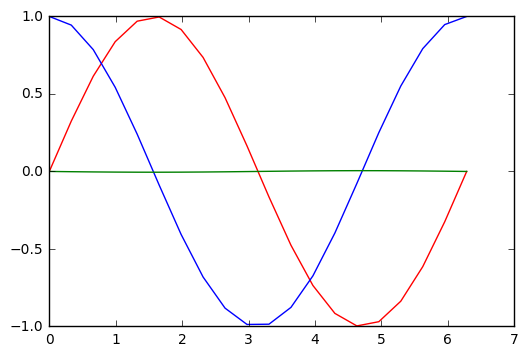

In [56]:
# your solution here
def deriv(x, func, step=0.01):
    return (func(x+step) - func(x))/step

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.0, 2.0 * np.pi, 20)
y = np.sin(x)

# a simple x-y plot
plt.plot(x, np.sin(x), 'r', x , deriv(x,np.sin), 'b', x, deriv(x, np.sin) - np.cos(x), 'g')


## Fancy indexing and masking
Slicing does not provide all the necessary functionality to extract sub-arrays. For instance, the application of a $\log$-function only should happen on elements larger than zero. We would therefore like to act on array elements meeting more complex conditions.

### Fancy indexing

In [57]:
import numpy as np

x = np.arange(1, 11, 1)
print(x)
ind = [1, 2, 8] # indices of elements we would like to extract
b = x[ind]
print(b)
b[0] = 100
print(b)
print(x)

[ 1  2  3  4  5  6  7  8  9 10]
[2 3 9]
[100   3   9]
[ 1  2  3  4  5  6  7  8  9 10]


In contrast to slicing, fancy indexing **always** returns **copies** of the original array!

### Masking

In [64]:
import numpy as np
import numpy.random as nr

x = nr.randint(-10, 10, 10)
print(x)
mask1 = (x > 0)  # mask is a bool array
y = x[mask1]    # extract the values from x where mask = True
print(y)
mask2 = (x > 0) & (x < 4)  # combined mask (and condition)
mask3 = (x < -5) | ( x > 5) # combined mask (or condition)
print(x[mask2])
print(x[mask3])

[ 8 -5  2 -2 -8 -1 -2  4  1  6]
[8 2 4 1 6]
[2 1]
[ 8 -8  6]


### Exercises:
- Give a Python command which multiplies all positive numbers in an integer-array with 2. Negative numbers should be unchanged. The mofification should happen in place, i.e. the original array is replaced by the new one.
- Write a Python function `my_sign` which calculates the signum function `sgn(x)` of an integer numpy-array:
  $$\text{sgn}(x)=\left\{\begin{array}{lr}-1 & x < 0 \\ 0 & x = 0 \\ 1 & x > 0\\\end{array}\right.$$
  The function should return a *new* array and leave the original one unchanged.

In [90]:
x = nr.randint(-10, 10, 10)
print(x, np.size(x))
x[x>0]*=2
print(x, np.size(x))

[ 0 -8 -6  7  4 -1  5  4  5 -5] 10
[ 0 -8 -6 14  8 -1 10  8 10 -5] 10


In [7]:
def my_sign(array):
    sign = array.copy()
    sign[sign<0]  = -1
    sign[sign==0] =  0
    sign[sign>0]  =  1
    return sign

a = np.array([5, -2, 10, 0, -3, 5, 0, 300])
b = my_sign(a)
print(a)
print(b)

[  5  -2  10   0  -3   5   0 300]
[ 1 -1  1  0 -1  1  0  1]


## Two-dimensional `numpy`-arrays
Two-dimensional arrays occur naturally as matrices, when reading data tables from a file or when creating 3D-plots. `numpy`-arrays can have any dimension though.

In [93]:
import numpy as np

a = np.array([[1,2,3], [4, 5,6]])
print(a)
print(a.dtype)     # the data-type object.
print(a.ndim)      # number of array dimensions
print(a.shape)     # shape of an array (interesting mainly for multi-dimensional arrays)
print(a.strides)   # The number of bytes fron one element to the next
print(a.size)      # total number of elements

[[1 2 3]
 [4 5 6]]
int32
2
(2, 3)
(12, 4)
6


### Slicing
Slicing and element access follows the same rules as in one dimension. The two dimensions are treated differently and separated with a comma within the element access operator.

In [94]:
import numpy as np

a = np.arange(32).reshape(4,8)  # reshape creates a view on the original array
                                # with a modified shape
print(a)
print(a[1,2])                   # access element of second row, thrid column
                                # first index = row, second index = column
print(a[1:3,2])                 # access elements in the second and third row and
                                # the third column
print(a[:,2])                   # access elements of third column    
print(a[2,:])                   # access elements of third row
print(a[1:-1,3:-1])             # access 2D-subarray

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]]
10
[10 18]
[ 2 10 18 26]
[16 17 18 19 20 21 22 23]
[[11 12 13 14]
 [19 20 21 22]]


### Array operations

The application of functions and operations between arrays happen *element-by-element*. By default, there is no notion of matrices or vectors!

In [96]:
import numpy as np

a = np.arange(4).reshape(2,2)
b = np.arange(5, 9).reshape(2,2)

print(a)
print(b)
print(a + b)
print(a * b)
print(np.sin(a))
print(a.dot(b))  # this is a matrix multiplication
print(a@b)

[[0 1]
 [2 3]]
[[5 6]
 [7 8]]
[[ 5  7]
 [ 9 11]]
[[ 0  6]
 [14 24]]
[[ 0.          0.84147098]
 [ 0.90929743  0.14112001]]
[[ 7  8]
 [31 36]]
[[ 7  8]
 [31 36]]


Interesting are dimensionality reduction functions:

In [97]:
import numpy as np

a = np.arange(6).reshape(3,2)

print(a)
print(np.sum(a))          # sum over all elements of the array
print(np.sum(a, axis=0))  # sum along the 'first axis' (rows)
print(np.sum(a, axis=1))# sum along the 'second axis' (columns)

[[0 1]
 [2 3]
 [4 5]]
15
[6 9]
[1 5 9]


### Reading simple data-tables into numpy-array
Very simple data tables in textfiles (numbers layout in columns) can be read with the `np.loadtxt` function into numpy-arrays

In [1]:
import numpy as np

a = np.loadtxt("data/slicing.txt")

print(a)

[[  0.   1.   2.   3.   4.   5.]
 [ 10.  11.  12.  13.  14.  15.]
 [ 20.  21.  22.  23.  24.  25.]
 [ 30.  31.  32.  33.  34.  35.]
 [ 40.  41.  42.  43.  44.  45.]
 [ 50.  51.  52.  53.  54.  55.]]


### Exercises

- Load the data from [data/slicing.txt](data/slicing.txt) into a `numpy`-array and obtain sub-arrays indicated by different colors with one `numpy` slice-command for each sub-array.

  <img src="figs/slicing.png",width=400,height=400>

In [103]:
a = np.loadtxt("data/slicing.txt")
print(a)
orange = a[0,3:5]
#print(orange)
red = a[:,2]
#print(red)
blue = a[-2:,-2:]
#print(blue)
green = a[2::2,::2]
print(green)

[[  0.   1.   2.   3.   4.   5.]
 [ 10.  11.  12.  13.  14.  15.]
 [ 20.  21.  22.  23.  24.  25.]
 [ 30.  31.  32.  33.  34.  35.]
 [ 40.  41.  42.  43.  44.  45.]
 [ 50.  51.  52.  53.  54.  55.]]
[[ 20.  22.  24.]
 [ 40.  42.  44.]]


- (This exercise is partly taken from a previous Python-class of Thomas Robitaille):  
  The [data/munich_temperatures_average_with_bad_data.txt](data/munich_temperatures_average_with_bad_data.txt) data file gives the temperature in Munich every day for several years:


In [24]:
!head data/munich_temperatures_average_with_bad_data.txt

1995.00274 0.944444
1995.00548 -1.61111
1995.00821 -3.55556
1995.01095 -9.83333
1995.01369 -10.2222
1995.01643 -9.5
1995.01916 -10.2222
1995.02190 -6.61111
1995.02464 -2.94444
1995.02738 1.55556


- Read in the file using np.loadtxt. The data contains bad values, which you can identify by looking at the minimum and maximum values of the array. Use masking to get rid of the bad temperature values.

- Plot the temperature against the year

- Calculate the following temperatures:
  - The mean temperature over all years and all months
  - The mean temperature in the months January until March
    (**Hint**: What is the fractional part of the given year encodings for these months)
  - The minimum, maximum and average temperature for each year between 1995 and 2012 (year 2013 has no complete
    coverage). You can use a `for`-loop over the years for this part.

The overall mean temperature is 8.933 °C


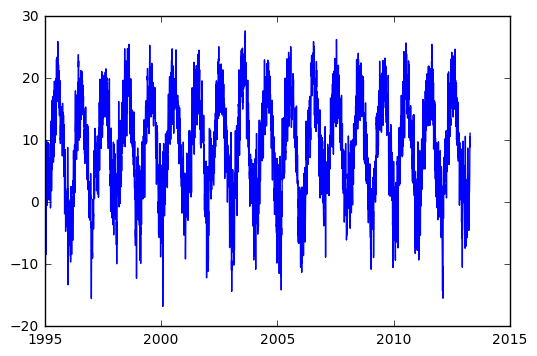

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("data/munich_temperatures_average_with_bad_data.txt")
year = data[:,0]
temp = data[:,1]

year = year[(temp<50)&(temp>-50)]
temp = temp[(temp<50)&(temp>-50)]
plt.plot(year,temp)

overall_mean = np.mean(temp)
print('The overall mean temperature is %.3f °C'%overall_mean)

jan = 31/365
feb = 28/365
mar = 31/365

np.unique?